# Analysis of Humanitarian Funding Evolution from 2010 to 2024

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# import data

file_path = '../../Data/2010-2024 Humanitarian Needs and Funding.xlsx'
df = pd.read_excel(file_path, sheet_name='Raw Data')



In [17]:
# View basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   1259 non-null   int64  
 1   Plan                   1259 non-null   object 
 2   Crisis Country         1259 non-null   object 
 3   Country Code           1236 non-null   object 
 4   Metric                 1259 non-null   object 
 5   Value                  1259 non-null   float64
 6   Standardised Plan      1259 non-null   object 
 7   Appeal Type            974 non-null    object 
 8   PiN Value for Dataviz  47 non-null     object 
 9   OUSG Metric            619 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 98.5+ KB


In [18]:
# Display summary statistics for numeric columns
df.describe()


,Year,Value
count,1259.000000,1.259000e+03
mean,2017.396346,4.000020e+08
std,3.972203,8.099401e+08
min,2010.000000,0.000000e+00
25%,2014.000000,5.751249e+06
50%,2017.000000,7.450000e+07
75%,2021.000000,4.324000e+08
max,2024.000000,6.080900e+09


In [19]:
# View the number of unique values in each column
df.nunique()


Year                       15
Plan                      158
Crisis Country             76
Country Code               66
Metric                      4
Value                    1065
Standardised Plan         162
Appeal Type                20
PiN Value for Dataviz       1
OUSG Metric                 3
dtype: int64

In [20]:
# Check for missing (null) values in the dataset
df.isnull().sum()


Year                        0
Plan                        0
Crisis Country              0
Country Code               23
Metric                      0
Value                       0
Standardised Plan           0
Appeal Type               285
PiN Value for Dataviz    1212
OUSG Metric               640
dtype: int64

In [21]:
# Check if there are any duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)


Number of duplicate rows: 7


In [ ]:
# Count how many times each metric appears
df['Metric'].value_counts()


Metric
Funding requirements    497
People in need          402
Funding received        306
People targeted          54
Name: count, dtype: int64

In [23]:
# Display the first 5 rows
df.head()


,Year,Plan,Crisis Country,Country Code,Metric,Value,Standardised Plan,Appeal Type,PiN Value for Dataviz,OUSG Metric
0,2010,Afghanistan,Afghanistan,AFG,People targeted,7800000.0,Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need
1,2010,Afghanistan,Afghanistan,AFG,Funding received,223824925.0,Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding received
2,2010,Afghanistan,Afghanistan,AFG,Funding requirements,448551322.0,Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding requirements
3,2010,Afghanistan,Afghanistan,AFG,People targeted,5400000.0,Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need
4,2010,Afghanistan,Afghanistan,AFG,Funding received,345246607.0,Afghanistan,Consolidated Appeal Process (CAP),NaN,NaN


In [46]:
# Filter only the metrics we need for analysis
metrics_needed = df[df['Metric'].isin(['People in need', 'People targeted', 'Funding requirements', 'Funding received'])]

# Pivot the data to make each metric a column
metrics_summary = metrics_needed.pivot_table(
    index=['Year', 'Plan', 'Crisis Country', 'Country Code'],
    columns='Metric',
    values='Value',
    aggfunc='sum'
).reset_index()

metrics_summary.head()

Metric,Year,Plan,Crisis Country,Country Code,Funding received,Funding requirements,People in need,People targeted
0,2010,Afghanistan,Afghanistan,AFG,2.919600e+09,6.249234e+09,58650000.0,22000000.0
1,2010,Afghanistan Flash Appeal,Afghanistan,AFG,5.350000e+07,1.521000e+08,NaN,NaN
2,2010,Afghanistan Humanitarian Action Plan,Afghanistan,AFG,5.052999e+08,7.745083e+08,NaN,NaN
3,2010,Bangladesh,Bangladesh,BGD,1.445100e+09,2.305400e+09,2500000.0,NaN
4,2010,Burkina Faso,Burkina Faso,BFA,1.619487e+08,1.260622e+08,NaN,3500000.0


In [57]:
# Rename metric columns to consistent format
metrics_summary.columns.name = None
metrics_summary = metrics_summary.rename(columns={
    'Funding received': 'Funding Received',
    'Funding requirements': 'Funding Requirements',
    'People in need': 'People in Need',
    'People targeted': 'People Targeted'
})

# Add funding gap and coverage columns
metrics_summary['Funding Gap'] = metrics_summary['Funding Requirements'] - metrics_summary['Funding Received']
metrics_summary['Funding Coverage (%)'] = (
    metrics_summary['Funding Received'] / metrics_summary['Funding Requirements']
) * 100

metrics_summary.head()

,Year,Plan,Crisis Country,Country Code,Funding Received,Funding Requirements,People in Need,People Targeted,Funding Gap,Funding Coverage (%)
0,2010,Afghanistan,Afghanistan,AFG,2.919600e+09,6.249234e+09,58650000.0,22000000.0,3.329634e+09,46.719322
1,2010,Afghanistan Flash Appeal,Afghanistan,AFG,5.350000e+07,1.521000e+08,NaN,NaN,9.860000e+07,35.174227
2,2010,Afghanistan Humanitarian Action Plan,Afghanistan,AFG,5.052999e+08,7.745083e+08,NaN,NaN,2.692084e+08,65.241379
3,2010,Bangladesh,Bangladesh,BGD,1.445100e+09,2.305400e+09,2500000.0,NaN,8.603000e+08,62.683265
4,2010,Burkina Faso,Burkina Faso,BFA,1.619487e+08,1.260622e+08,NaN,3500000.0,-3.588653e+07,128.467331


In [58]:
# Group by Year and Country to get totals per country per year
country_year_summary = metrics_summary.groupby(['Year', 'Crisis Country'])[
    ['Funding Received', 'Funding Requirements', 'Funding Gap']
].sum().reset_index()

# Calculate funding coverage percentage per country per year
country_year_summary['Funding Coverage (%)'] = (
    country_year_summary['Funding Received'] / country_year_summary['Funding Requirements']
) * 100


country_year_summary.head(10)

,Year,Crisis Country,Funding Received,Funding Requirements,Funding Gap,Funding Coverage (%)
0,2010,Afghanistan,3.478400e+09,7.175842e+09,3.697443e+09,48.473747
1,2010,Bangladesh,1.445100e+09,2.305400e+09,8.603000e+08,62.683265
2,2010,Burkina Faso,1.619487e+08,1.260622e+08,-3.588653e+07,128.467331
3,2011,Bangladesh,0.000000e+00,8.710000e+08,0.000000e+00,0.000000
4,2011,Benin,0.000000e+00,0.000000e+00,0.000000e+00,NaN
5,2011,Burkina Faso,2.800966e+08,1.075140e+09,7.950439e+08,26.052090
6,2011,Burundi,6.359000e+08,2.086800e+09,1.450900e+09,30.472494
7,2011,Cameroon,5.280000e+08,8.601000e+08,3.321000e+08,61.388211
8,2012,Burkina Faso,0.000000e+00,6.074000e+08,0.000000e+00,0.000000
9,2012,Burundi,8.540000e+07,1.040000e+08,0.000000e+00,82.115385


In [61]:
# Create yearly global summary
yearly_summary = country_year_summary.groupby('Year')[
    ['Funding Received', 'Funding Requirements', 'Funding Gap']
].sum().reset_index()

# Add global funding coverage
yearly_summary['Funding Coverage (%)'] = (
    yearly_summary['Funding Received'] / yearly_summary['Funding Requirements']
) * 100

yearly_summary.head()

,Year,Funding Received,Funding Requirements,Funding Gap,Funding Coverage (%)
0,2010,5.085448e+09,9.607304e+09,4.521856e+09,52.933144
1,2011,1.443997e+09,4.893040e+09,2.578044e+09,29.511233
2,2012,4.424168e+09,1.126303e+10,6.212860e+09,39.280448
3,2013,4.712464e+09,1.034853e+10,5.727619e+09,45.537517
4,2014,3.878980e+09,9.923709e+09,5.259710e+09,39.088011


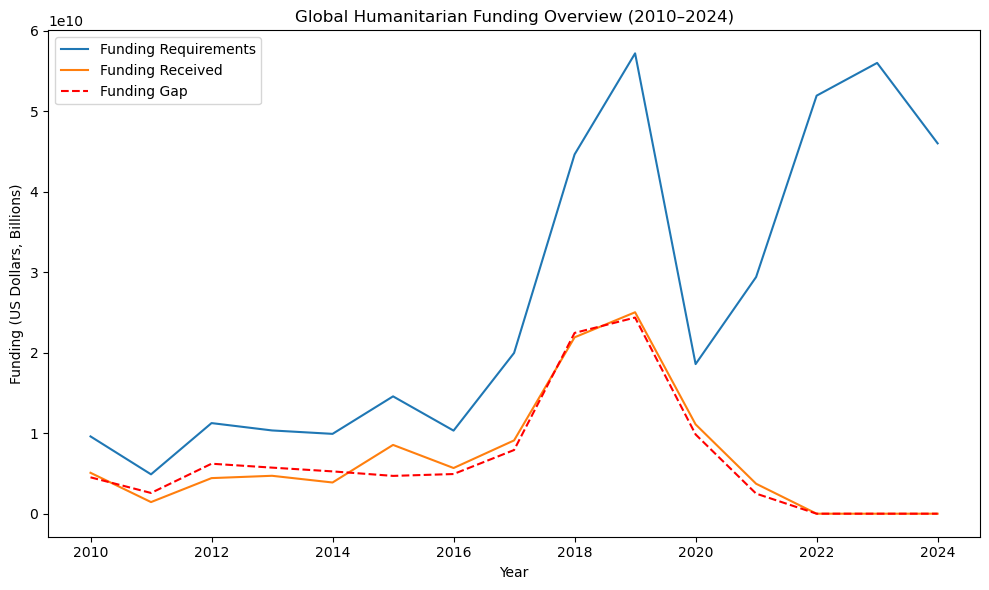

In [67]:
# Plot 1: Global Funding Evolution Over Time (in Billions)

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_summary, x='Year', y='Funding Requirements', label='Funding Requirements')
sns.lineplot(data=yearly_summary, x='Year', y='Funding Received', label='Funding Received')
sns.lineplot(data=yearly_summary, x='Year', y='Funding Gap', label='Funding Gap', linestyle='--', color='red')
plt.title('Global Humanitarian Funding Overview (2010–2024)')
plt.ylabel('Funding (US Dollars, Billions)')
plt.xlabel('Year')
plt.legend()
plt.tight_layout()
plt.show()


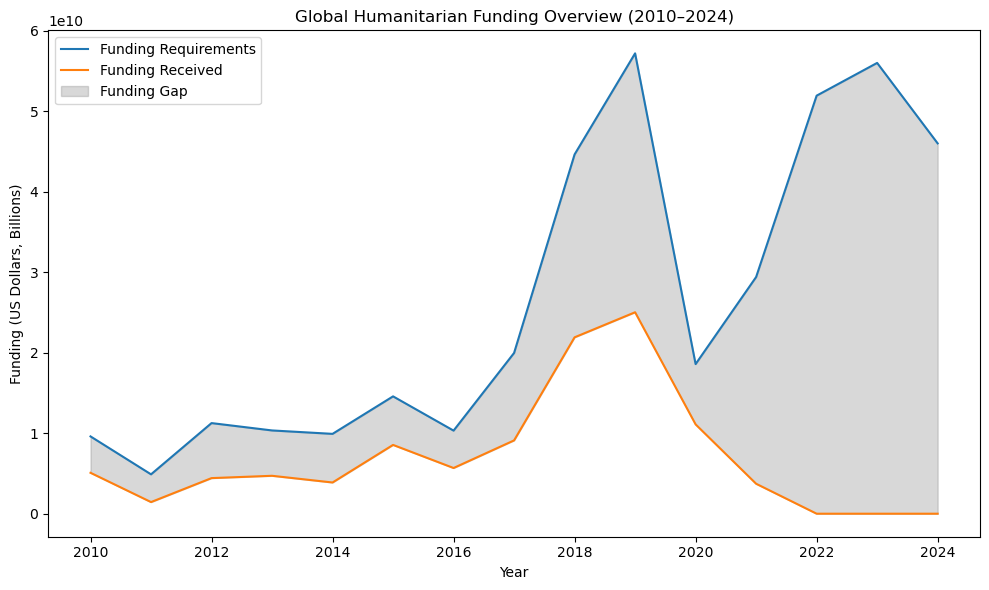

In [73]:
# Plot 2: Global Funding Gap Over Time (in Billions)
# Line Plot with Shaded Funding Gap (2010–2024)

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_summary, x='Year', y='Funding Requirements', label='Funding Requirements')
sns.lineplot(data=yearly_summary, x='Year', y='Funding Received', label='Funding Received')

# Fill the gap
plt.fill_between(
    yearly_summary['Year'],
    yearly_summary['Funding Requirements'],
    yearly_summary['Funding Received'],
    where=(yearly_summary['Funding Requirements'] > yearly_summary['Funding Received']),
    color='gray',
    alpha=0.3,
    interpolate=True,
    label='Funding Gap'
)

plt.title('Global Humanitarian Funding Overview (2010–2024)')
plt.ylabel('Funding (US Dollars, Billions)')
plt.xlabel('Year')
plt.legend()
plt.tight_layout()
plt.show()

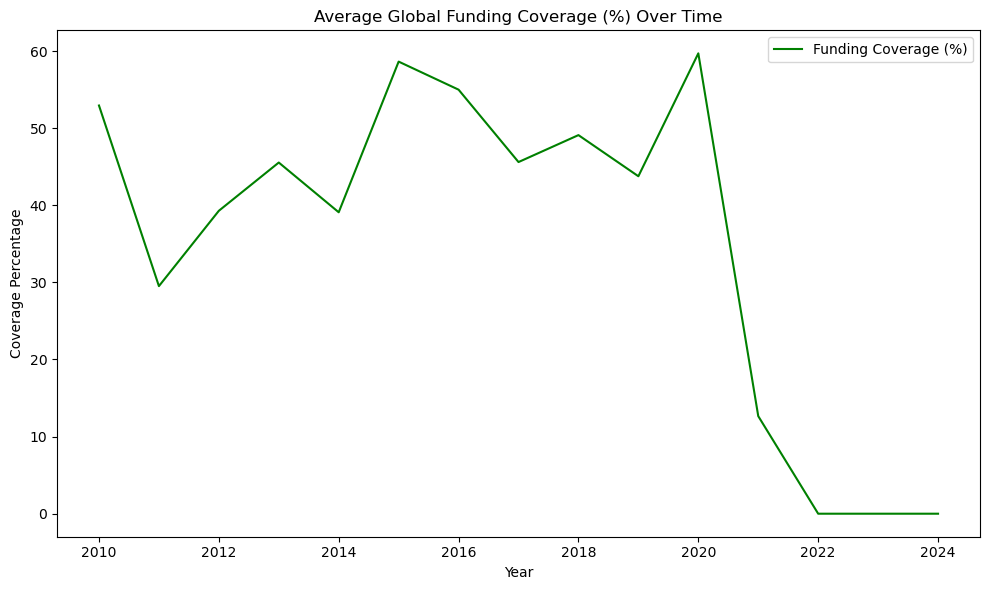

In [74]:
# Plot 3: Average Global Funding Coverage Over Time (%) 

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_summary, x='Year', y='Funding Coverage (%)', label='Funding Coverage (%)', color='green')
plt.title('Average Global Funding Coverage (%) Over Time')
plt.ylabel('Coverage Percentage')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

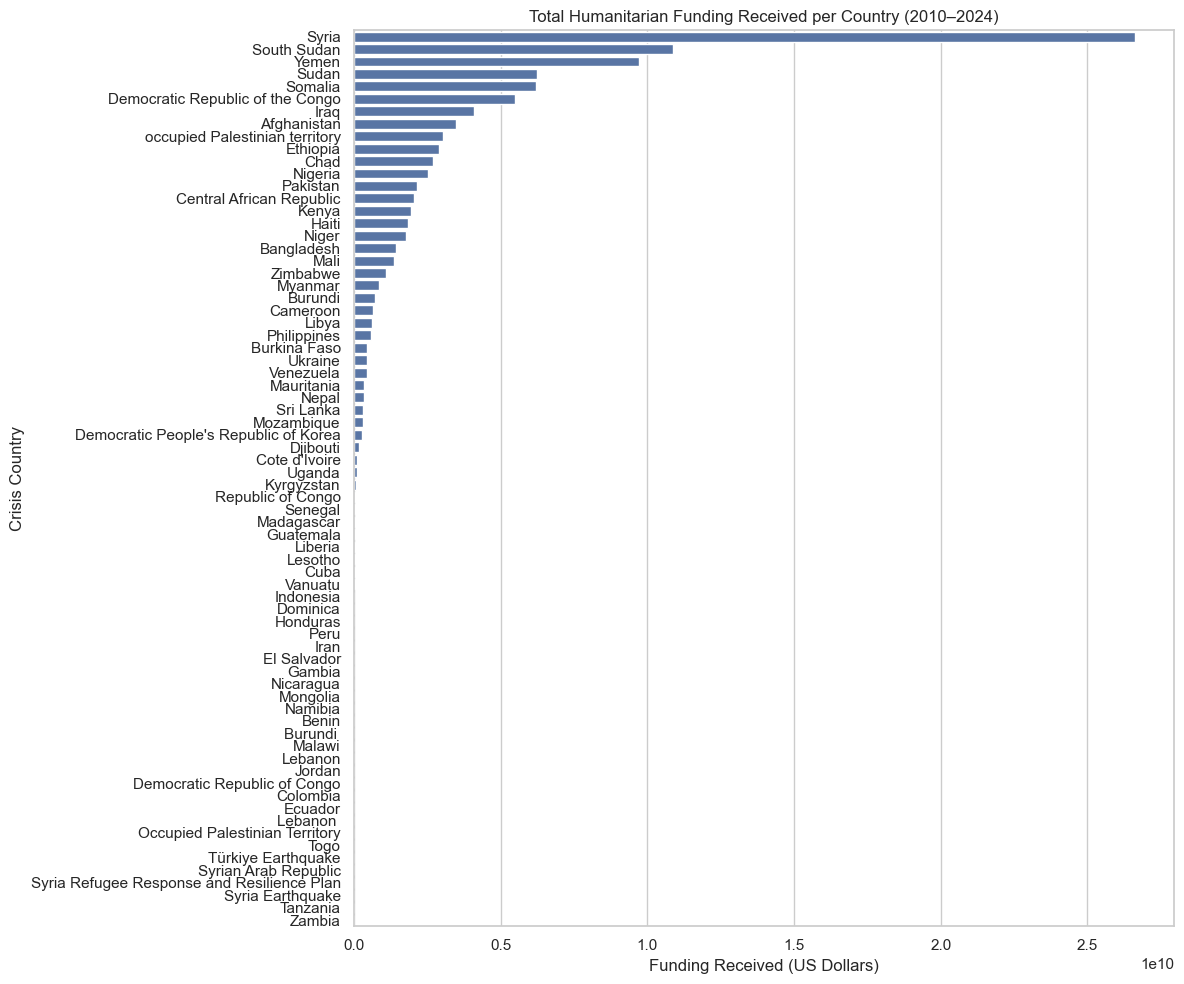

In [106]:
# Plot 4: Aggregate total funding received per country (in Billions)
total_funding_by_country = country_year_summary.groupby('Crisis Country')['Funding Received'].sum().sort_values(ascending=False)

# Create the barplot
plt.figure(figsize=(12, 10))
sns.barplot(x=total_funding_by_country.values, y=total_funding_by_country.index,)

plt.title('Total Humanitarian Funding Received per Country (2010–2024)')
plt.xlabel('Funding Received (US Dollars)')
plt.ylabel('Crisis Country')
plt.tight_layout()
plt.show()

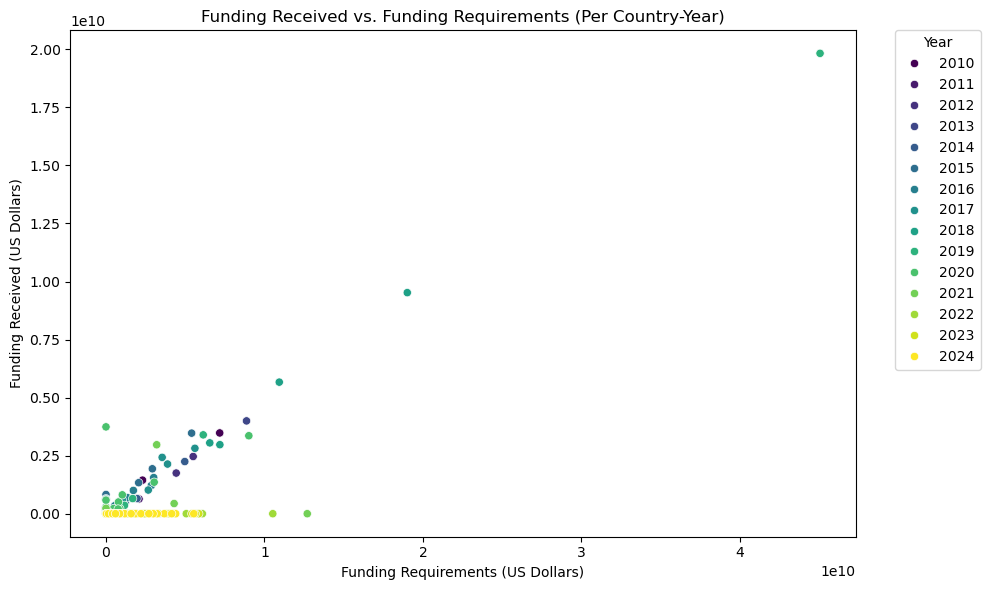

Pearson correlation between funding requirements and funding received: 0.873


In [97]:

# Plot 5: Funding Received vs Requirements (Country-Year Level) — USD 
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=country_year_summary,
    x='Funding Requirements',
    y='Funding Received',
    hue='Year',
    palette='viridis',
    legend= 'full',
)
plt.title('Funding Received vs. Funding Requirements (Per Country-Year)')
plt.xlabel('Funding Requirements (US Dollars)')
plt.ylabel('Funding Received (US Dollars)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

# Pearson correlation between Funding Requirements and Funding Received
funding_corr = country_year_summary['Funding Requirements'].corr(country_year_summary['Funding Received'])
print(f"Pearson correlation between funding requirements and funding received: {funding_corr:.3f}")


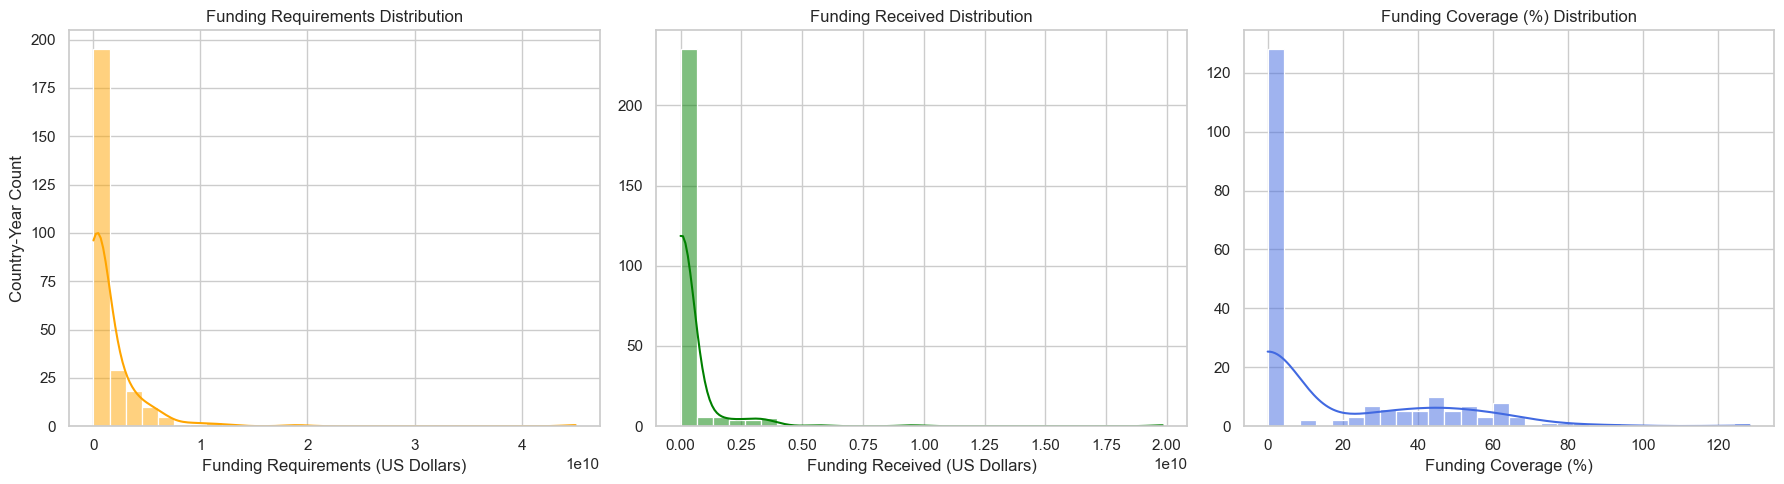

In [107]:
# View distribution curve of Funding Requirements, Funding Received and Funding Coverage %  

# Create 3 side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Distribution of Funding Requirements
sns.histplot(
    country_year_summary['Funding Requirements'].dropna(),
    bins=30,
    kde=True,
    color='orange',
    ax=axes[0]
)
axes[0].set_title('Funding Requirements Distribution')
axes[0].set_xlabel('Funding Requirements (US Dollars)')
axes[0].set_ylabel('Country-Year Count')

# Plot 2: Distribution of Funding Received
sns.histplot(
    country_year_summary['Funding Received'].dropna(),
    bins=30,
    kde=True,
    color='green',
    ax=axes[1]
)
axes[1].set_title('Funding Received Distribution')
axes[1].set_xlabel('Funding Received (US Dollars)')
axes[1].set_ylabel('')

# Plot 3: Distribution of Funding Coverage (%)
sns.histplot(
    country_year_summary['Funding Coverage (%)'].dropna(),
    bins=30,
    kde=True,
    color='royalblue',
    ax=axes[2]
)
axes[2].set_title('Funding Coverage (%) Distribution')
axes[2].set_xlabel('Funding Coverage (%)')
axes[2].set_ylabel('')

# Layout fix
plt.tight_layout()
plt.show()


# Reflections

Based on the visualization created, the following were observed:


# Analysis Question
How has humanitarian funding evolved globally and across countries from 2010 to 2024, including funding gaps, coverage trends, and was the distribution of funding coverage across countries balanced or skewed?

Ans: